In [1]:
import pandas as pd

# Load the provided Excel file to examine its content
file_path = r'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型.xlsx'
xls = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
# xls.sheet_names


In [2]:
# Load the data from the first sheet
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the data to understand its structure
data.head()


,ID,Year,Province,Educational fund,GDP per capita,Urbanization ratio,Number of beds,Death toll,Population_Exposure
0,12,2000,Anhui,1.034184e+10,4867.0,27.81,124000.0,340562.0,70945.976471
1,1,2000,Beijing,1.930682e+10,22460.0,77.54,71000.0,69757.0,98540.913725
2,22,2000,Chongqing,6.012781e+09,5157.0,33.09,66000.0,209655.0,112535.639216
3,13,2000,Fujian,1.042182e+10,11601.0,41.57,90000.0,171136.0,2494.588235
4,28,2000,Gansu,4.767929e+09,3838.0,24.01,59000.0,147783.0,300805.439216


In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 读取数据
# file_path = '热浪暴露固定效应模型.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure + ln_GDP_per_capita + Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     390.5
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          7.37e-188
Time:                        16:29:58   Log-Likelihood:                -7914.9
No. Observations:                 619   AIC:                         1.584e+04
Df Residuals:                     613   BIC:                         1.587e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.348e+06   1

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


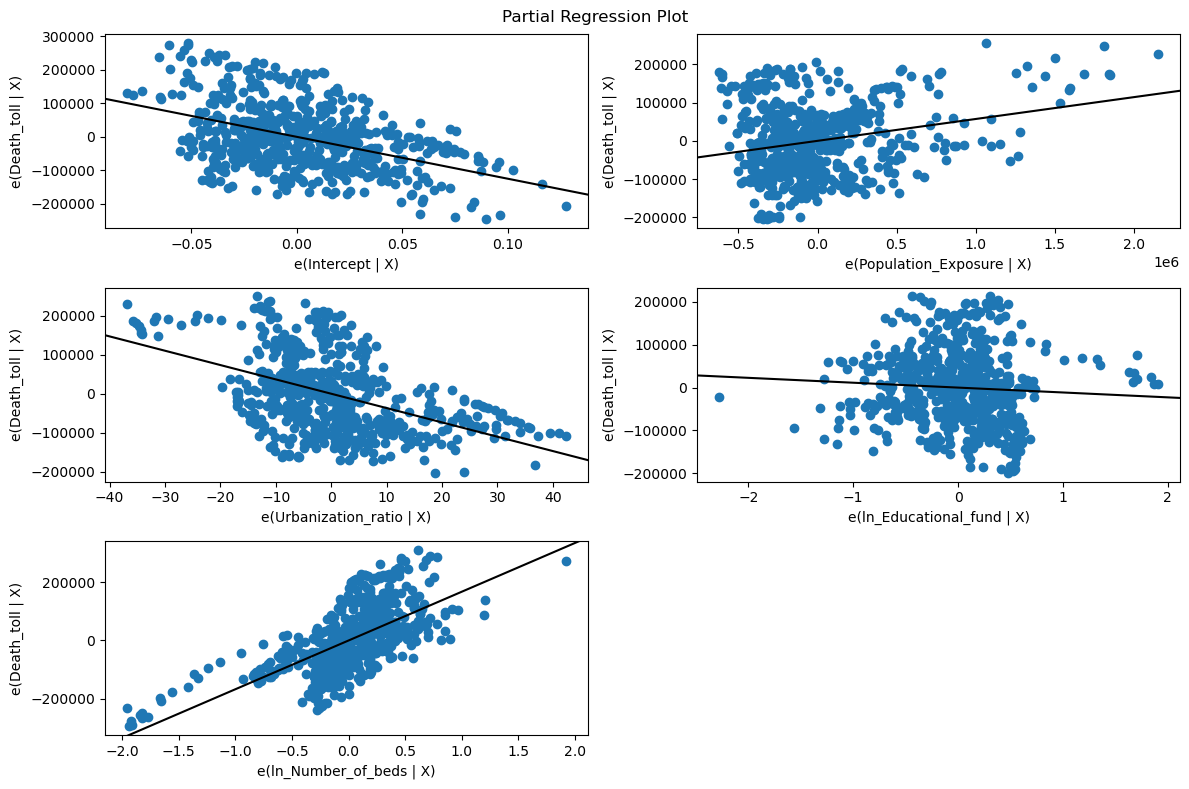

In [26]:
import statsmodels.api as sm

# 绘制部分回归图
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_ln, fig=fig)
plt.show()


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# 使用 patsy 生成设计矩阵
y, X = dmatrices('Death_toll ~ Population_Exposure + ln_GDP_per_capita + Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds', data, return_type='dataframe')

# 计算每个解释变量的 VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


              Variable          VIF
0            Intercept  1156.293823
1  Population_Exposure     1.334737
2    ln_GDP_per_capita    12.785655
3   Urbanization_ratio     3.539951
4  ln_Educational_fund    21.701364
5    ln_Number_of_beds    10.283017


In [32]:
# 删除 ln_Educational_fund 变量
formula_ln = 'Death_toll ~ Population_Exposure + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

# 再次计算 VIF
y, X = dmatrices(formula_ln, data, return_type='dataframe')
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     489.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.68e-189
Time:                        19:00:33   Log-Likelihood:                -7927.4
No. Observations:                 620   AIC:                         1.586e+04
Df Residuals:                     615   BIC:                         1.589e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.286e+06   6

In [30]:
# 删除 ln_Educational_fund 变量
formula_ln = 'Death_toll ~ Population_Exposure + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

# 再次计算 VIF
y, X = dmatrices(formula_ln, data, return_type='dataframe')
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     489.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.68e-189
Time:                        17:31:57   Log-Likelihood:                -7927.4
No. Observations:                 620   AIC:                         1.586e+04
Df Residuals:                     615   BIC:                         1.589e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.286e+06   6

In [13]:
# 构建固定效应模型的公式，使用自然对数变量
formula_ln_4 = 'Death_toll ~ Population_Exposure +  Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln_4 = smf.ols(formula_ln_4, data=data).fit()

# 输出回归结果
print(model_ln_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     486.1
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.22e-188
Time:                        17:09:32   Log-Likelihood:                -7916.3
No. Observations:                 619   AIC:                         1.584e+04
Df Residuals:                     614   BIC:                         1.586e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.248e+06   1

In [14]:
# 构建固定效应模型的公式，使用自然对数变量
formula_ln_3 = 'Death_toll ~ Population_Exposure +  ln_Educational_fund + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln_3 = smf.ols(formula_ln_3, data=data).fit()

# 输出回归结果
print(model_ln_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     467.7
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          3.31e-158
Time:                        17:10:04   Log-Likelihood:                -7990.2
No. Observations:                 619   AIC:                         1.599e+04
Df Residuals:                     615   BIC:                         1.601e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.775e+05   9

In [18]:
# 构建固定效应模型的公式，使用自然对数变量
formula_ln_2 = 'Death_toll ~ Population_Exposure +   ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln_2 = smf.ols(formula_ln_2, data=data).fit()

# 输出回归结果
print(model_ln_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     555.1
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.21e-138
Time:                        17:14:03   Log-Likelihood:                -8052.0
No. Observations:                 620   AIC:                         1.611e+04
Df Residuals:                     617   BIC:                         1.612e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.419e+06   6

In [17]:
# 构建固定效应模型的公式，使用自然对数变量
formula_ln_1 = 'Death_toll ~ Population_Exposure '

# 拟合固定效应模型（OLS）
model_ln_1 = smf.ols(formula_ln_1, data=data).fit()

# 输出回归结果
print(model_ln_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           2.01e-34
Time:                        17:13:53   Log-Likelihood:                -8296.0
No. Observations:                 620   AIC:                         1.660e+04
Df Residuals:                     618   BIC:                         1.660e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.14e+05   7

In [21]:
# 构建固定效应模型的公式，使用自然对数变量
formula_ln_5 = 'Death_toll ~ Population_Exposure +  Urbanization_ratio '

# 拟合固定效应模型（OLS）
model_ln_5 = smf.ols(formula_ln_5, data=data).fit()

# 输出回归结果
print(model_ln_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           3.73e-41
Time:                        17:17:21   Log-Likelihood:                -8277.6
No. Observations:                 620   AIC:                         1.656e+04
Df Residuals:                     617   BIC:                         1.657e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.317e+05   2

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_10000 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds+ Total_Precipitation'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     392.6
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          1.59e-188
Time:                        10:45:23   Log-Likelihood:                -7926.5
No. Observations:                 620   AIC:                         1.586e+04
Df Residuals:                     614   BIC:                         1.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [4]:
# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_TX95 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds+ Total_Precipitation'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     382.3
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          7.40e-186
Time:                        10:48:45   Log-Likelihood:                -7932.7
No. Observations:                 620   AIC:                         1.588e+04
Df Residuals:                     614   BIC:                         1.590e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [5]:
# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_TX99 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds+ Total_Precipitation'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     362.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          1.41e-180
Time:                        10:49:19   Log-Likelihood:                -7945.0
No. Observations:                 620   AIC:                         1.590e+04
Df Residuals:                     614   BIC:                         1.593e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [10]:
# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_T28 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds'
# formula_ln = 'Death_toll ~ Population_Exposure_T28 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds+ Total_Precipitation'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     852.4
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          3.54e-249
Time:                        11:23:50   Log-Likelihood:                -7788.8
No. Observations:                 620   AIC:                         1.559e+04
Df Residuals:                     615   BIC:                         1.561e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

In [9]:
# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_T30 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     595.3
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          8.52e-210
Time:                        11:01:28   Log-Likelihood:                -7880.3
No. Observations:                 620   AIC:                         1.577e+04
Df Residuals:                     615   BIC:                         1.579e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [8]:
# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_T32 + ln_GDP_per_capita + Urbanization_ratio + ln_Number_of_beds+ Total_Precipitation'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          1.19e-184
Time:                        10:50:25   Log-Likelihood:                -7935.5
No. Observations:                 620   AIC:                         1.588e+04
Df Residuals:                     614   BIC:                         1.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [12]:
# Load the newly uploaded CSV file
file_path ='E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.csv'
data = pd.read_csv(file_path)

# Selecting the relevant columns for analysis
columns_to_analyze = ['Population_Exposure_T32', 'Population_Exposure_T30', 'Population_Exposure_T28', 
                      'Population_Exposure_TX99', 'Population_Exposure_TX95', 'Population_Exposure_TX90']

# Calculating the summary statistics for the selected columns (sum, mean, std, min, max)
summary_stats = data[columns_to_analyze].agg(['sum', 'mean', 'std', 'min', 'max'])

# Outputting the summary statistics for review
summary_stats


C:\Users\HP\AppData\Local\Temp\ipykernel_18684\3939527007.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Population_Exposure_T32,Population_Exposure_T30,Population_Exposure_T28,Population_Exposure_TX99,Population_Exposure_TX95,Population_Exposure_TX90
sum,8.210792e+07,6.905119e+08,1.444966e+09,1.004688e+06,4.037400e+07,1.720914e+08
mean,1.324321e+05,1.113729e+06,2.330591e+06,1.620465e+03,6.511935e+04,2.775669e+05
std,2.915855e+05,1.590850e+06,2.596556e+06,1.437173e+04,1.846356e+05,4.576367e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.586687e+06,1.100000e+07,1.360000e+07,2.049902e+05,1.815625e+06,2.839297e+06


In [8]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 读取数据
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 重命名列，避免特殊字符问题
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# 对指定变量进行自然对数转换
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 构建固定效应模型的公式，使用自然对数变量
formula_ln = 'Death_toll ~ Population_Exposure_P90 + ln_GDP_per_capita + Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds'

# 拟合固定效应模型（OLS）
model_ln = smf.ols(formula_ln, data=data).fit()

# 输出回归结果
print(model_ln.summary())


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     392.5
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.29e-188
Time:                        21:07:04   Log-Likelihood:                -7913.7
No. Observations:                 619   AIC:                         1.584e+04
Df Residuals:                     613   BIC:                         1.587e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [11]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load your data
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to avoid issues with special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Apply natural log transformation to specified variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Impute missing values (using mean imputation here)
data['ln_Educational_fund'].fillna(data['ln_Educational_fund'].mean(), inplace=True)

# Scale the variables to avoid overflow issues
scaler = StandardScaler()
scaled_columns = ['Population_Exposure_P90', 'ln_GDP_per_capita', 'Urbanization_ratio', 'ln_Educational_fund', 'ln_Number_of_beds']

data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Construct the Poisson regression formula
formula_poisson = 'Death_toll ~ Population_Exposure_P90 + ln_GDP_per_capita + Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds'

# Fit the Poisson regression model with scaled data
poisson_model_scaled = smf.poisson(formula_poisson, data=data).fit()

# Output the summary of the scaled Poisson model
print(poisson_model_scaled.summary())


Optimization terminated successfully.
         Current function value: 6107.761088
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:             Death_toll   No. Observations:                  620
Model:                        Poisson   Df Residuals:                      614
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.9007
Time:                        13:06:11   Log-Likelihood:            -3.7868e+06
converged:                       True   LL-Null:                   -3.8128e+07
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.1990      0.000   1.15e+05      0.000      12.199

In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load your data
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Rename columns to avoid issues with special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Apply natural log transformation to specified variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Impute missing values (using mean imputation here)
data['ln_Educational_fund'].fillna(data['ln_Educational_fund'].mean(), inplace=True)

# Scale the variables to avoid overflow issues
scaler = StandardScaler()
scaled_columns = ['Population_Exposure_T28', 'ln_GDP_per_capita', 'Urbanization_ratio', 'ln_Educational_fund', 'ln_Number_of_beds']

data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Construct the Poisson regression formula
formula_poisson = 'Death_toll ~ Population_Exposure_T28 + ln_GDP_per_capita + Urbanization_ratio + ln_Educational_fund + ln_Number_of_beds'

# Fit the Poisson regression model with scaled data
poisson_model_scaled = smf.poisson(formula_poisson, data=data).fit()

# Output the summary of the scaled Poisson model
print(poisson_model_scaled.summary())


Optimization terminated successfully.
         Current function value: 4808.792476
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:             Death_toll   No. Observations:                  620
Model:                        Poisson   Df Residuals:                      614
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.9218
Time:                        13:12:25   Log-Likelihood:            -2.9815e+06
converged:                       True   LL-Null:                   -3.8128e+07
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.2107      0.000   1.17e+05      0.000      12.211

In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load your data
file_path = 'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
# Rename columns to handle special characters
data = data.rename(columns={
    'GDP per capita': 'GDP_per_capita',
    'Urbanization ratio': 'Urbanization_ratio',
    'Educational fund': 'Educational_fund',
    'Number of beds': 'Number_of_beds',
    'Death toll': 'Death_toll'
})

# Log transform certain columns to create the needed variables
data['ln_Educational_fund'] = data['Educational_fund'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_GDP_per_capita'] = data['GDP_per_capita'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Number_of_beds'] = data['Number_of_beds'].apply(lambda x: np.log(x) if x > 0 else np.nan)
data['ln_Total_Precipitation'] = data['Total_Precipitation'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Define different model specifications
formulas ='Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation'
    # 'Death_toll ~ Population_Exposure_TX90',  # Model 1: Only Exposure
    # 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio',  # Model 2: + GDP
    # 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio + ln_Number_of_beds',  # Model 3: + Urbanization
    # 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio+ ln_Number_of_beds + ln_Total_Precipitation '  # Model 4: + Beds
    # 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita',
    # 'Death_toll ~ Population_Exposure_TX90 + Urbanization_ratio + ln_Number_of_beds + ln_Total_Precipitation + ln_GDP_per_capita+ln_Educational_fund',  # Model 5: + Precipitation# Model 5: + Precipitation



# 拟合固定效应模型（OLS）
model_ln = smf.ols(formulas, data=data).fit()

# 输出回归结果
print(model_ln.summary())


                            OLS Regression Results                            
Dep. Variable:             Death_toll   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     537.4
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          4.58e-199
Time:                        20:31:51   Log-Likelihood:                -7905.2
No. Observations:                 620   AIC:                         1.582e+04
Df Residuals:                     615   BIC:                         1.584e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               